In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

np.random.seed(5)

dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=',', dtype =  np.float32)

x_train = dataset[:700, 0:8]
y_train = dataset[:700, 8]
x_test = dataset[700:, 0:8]
y_test = dataset[700:, 8]

model = Sequential()
model.add(Dense(12, input_shape=(8, ), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss="binary_crossentropy", optimizer = 'Adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1500, batch_size=64)

scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2025-05-07 00:22:59.965399: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1500


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6602 - loss: 11.3578 
Epoch 2/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6447 - loss: 8.3700 
Epoch 3/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6801 - loss: 5.8976 
Epoch 4/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6515 - loss: 3.5809 
Epoch 5/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5229 - loss: 2.2774 
Epoch 6/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5136 - loss: 1.3866  
Epoch 7/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5398 - loss: 0.9902 
Epoch 8/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6118 - loss: 0.9008 
Epoch 9/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6320 - loss: 0.8316 
Epoch 10/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6214 - loss: 0.8524 
Epoch 11/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5932 - loss: 0.8344 
Epoch 12/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [2]:
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.csv', names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [3]:
df.describe() 

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [5]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index = False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


<Axes: >

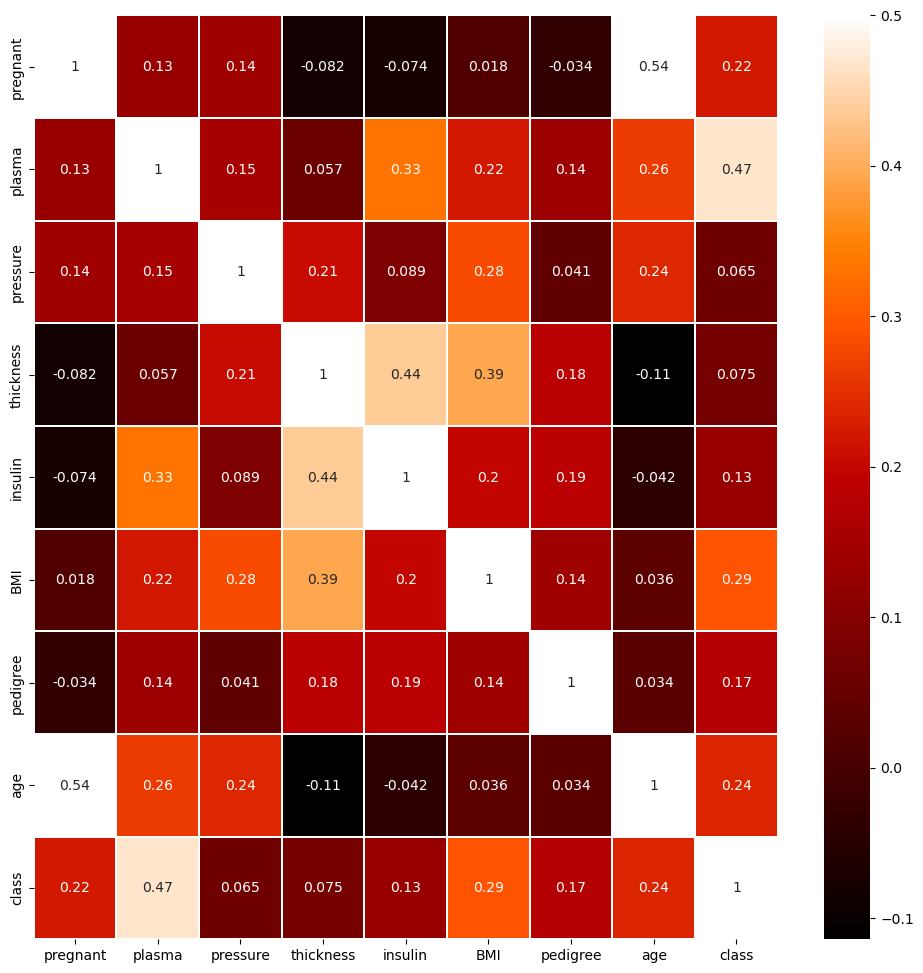

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)